# 读取模型

In [1]:
import torch
import matplotlib.pyplot as plt

from model_load import load, transform, idx2char, device
model = load()

# 洛谷拿图预测

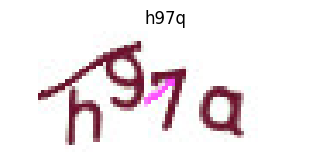

In [6]:
import requests
from io import BytesIO
from PIL import Image

page_url = 'https://www.luogu.com.cn/lg4/captcha'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
    'Referer': 'https://www.luogu.com.cn/'
}
response = requests.get(page_url, headers=headers, timeout=10)
response.raise_for_status()

img_pil = Image.open(BytesIO(response.content)).convert('RGB')

img_t = transform(img_pil).unsqueeze(0).to(device)

with torch.no_grad():
    outs = model(img_t)

pred_idxs = [torch.argmax(o, dim=1).item() for o in outs]
pred_str = ''.join(idx2char[i] for i in pred_idxs)

plt.figure(figsize=(4,2))
plt.imshow(img_pil)
plt.title(pred_str)
plt.axis('off')
plt.show()
